In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importa dati sulle vaccinazioni

In [2]:
df_vacc = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')
df_vacc = df_vacc.fillna(method='backfill')

def get_vaccine_data(country):
    # source ourworldindata
    
    df_vacc_country = df_vacc[df_vacc['location']==country].iloc[2:,:]
    
    date = pd.to_datetime(df_vacc_country['date'])
    vacc1 = np.array(df_vacc_country['people_vaccinated_per_hundred'])  
    vacc2 = np.array(df_vacc_country['people_fully_vaccinated_per_hundred']) 
    
    df_vacc_new = pd.DataFrame(np.transpose([vacc1,vacc2]))
    df_vacc_new.index = date
    df_vacc_new.columns=['% vaccinated with 1 dose','% fully vaccinated']
    
    return df_vacc_new

### Importa dati epidemiologici

In [3]:
file_confirmed='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
file_deaths='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
file_recovered='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df_confirmed=pd.read_csv(file_confirmed)
df_deaths=pd.read_csv(file_deaths)
df_recovered=pd.read_csv(file_recovered)
date = pd.to_datetime(df_confirmed.columns[4:])

def get_epidemic_data(country):
    # source Johns Hopkins Unversity
    ydata_cases = (df_confirmed[df_confirmed['Country/Region']==country].iloc[:,4:]).sum()
    ydata_deaths = (df_deaths[df_deaths['Country/Region']==country].iloc[:,4:]).sum()
    ydata_rec = (df_recovered[df_recovered['Country/Region']==country].iloc[:,4:]).sum()
    ydata_inf = ydata_cases-ydata_deaths-ydata_rec   
    daily_cases = ydata_cases.diff().rolling(window=7).mean()
    daily_deaths = ydata_deaths.diff().rolling(window=7).mean()
    
    df_epidemic = pd.DataFrame(np.transpose([ydata_cases,ydata_inf,ydata_deaths,ydata_rec,daily_cases,daily_deaths]))
    df_epidemic.index = date
    df_epidemic.columns = ['Total cases','Active infected','Total deaths','Total recovered','Daily cases (avg 7 days)','Daily deaths (avg 7 days)']
    
    return df_epidemic

### Risultati

In [ ]:
nomi_nazioni = ['Bulgaria', 'Portugal']
label_nazioni = ['Bulgaria', 'Portogallo']
abitanti_nazioni = [6.927, 10.31]

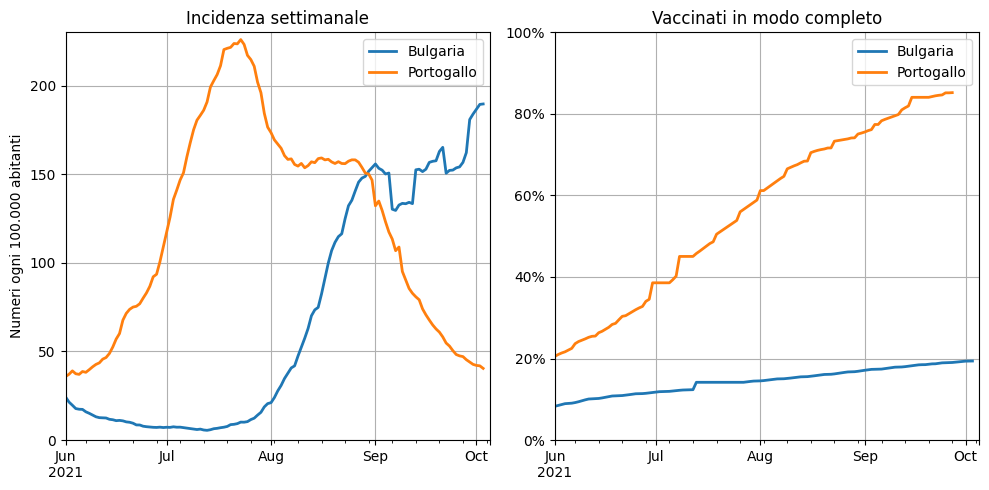

In [7]:
plt.style.use('default')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


for i in range(len(nomi_nazioni)):
    (7/(abitanti_nazioni[i]*10)*get_epidemic_data(nomi_nazioni[i])['Daily cases (avg 7 days)']).plot(ax=axes[0], 
                                                                label=label_nazioni[i], linewidth=2)
axes[0].set_xlim('2021-06-01', '2021-10-5')
axes[0].set_ylim(0, 230)
axes[0].set_title('Incidenza settimanale')
axes[0].set_ylabel('Numeri ogni 100.000 abitanti')
axes[0].legend()
axes[0].grid()

for i in range(len(nomi_nazioni)):
    get_vaccine_data(nomi_nazioni[i])['% fully vaccinated'].plot(ax=axes[1], 
                                                    label=label_nazioni[i], linewidth=2)
axes[1].set_xlim('2021-06-01', '2021-10-5')
axes[1].set_ylim(0, 100)
axes[1].set_yticks(np.arange(0, 101, 20))
axes[1].set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
axes[1].set_title('Vaccinati in modo completo')
axes[1].set_xlabel('')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.savefig('../risultati/confronto_nazioni_epidemia-vaccino.png', dpi=300)
plt.show()